In [1]:
#import all relevant packages
import pandas as pd

In [2]:
#Import data. Data was formatted such that each year was its own .txt file, so we first combine these files to one df
df = pd.DataFrame()
for i in range(1880,2021):
    header_list = ['Name', 'Sex', 'Count'] #name columns
    df_i = pd.read_csv('data/names/yob'+ str(i) +'.txt', names=header_list) #import year i data
    df_i['Year']=i #add column indicating year i
    df = pd.concat([df,df_i])#combine all years of data

In [3]:
#Define a function to create a new dataframe filtering by a sinlge name and sex, with rows indexed by year
def filter_name_sex(df,firstname,sex):
    df_new = df[df['Name'] == firstname] #filter by name
    df_new = df_new[df_new['Sex'] == sex] #filter by sex
    df_new.index = df_new['Year'] #index by year
    del df_new['Year']
    return df_new
    

In [4]:
#Define a function with inputs a name and outputs a dataframe indexed by year with columns for 'F Count', 'M Count', and 'Count' (total F+M) for a given name
def name_df(df,name):
    df_new = pd.DataFrame() #create empty df indexed by years
    df_new['Year'] = df['Year'].drop_duplicates() 
    df_new.index = df_new['Year']
    del df_new['Year']
    df_new['F Count'] = filter_name_sex(df,name,'F')['Count'] #add col for F Count via filter_name_sex funtion for F
    df_new['M Count'] = filter_name_sex(df,name,'M')['Count'] #add col for M Count via filter_name_sex funtion for M
    df_new = df_new.fillna(0)
    df_new['Count'] = df_new['F Count']+df_new['M Count'] #add col for totalling both F count and M count for this name
    return df_new

In [5]:
#Define a quick plot tool with an input of first name
def plot_name(df,name):
    df_new = name_df(df,name)
    df_new.plot(y=['F Count','M Count','Count'], title = name)

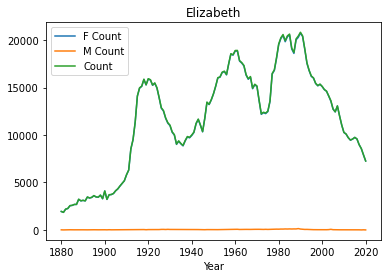

In [6]:
#Let's plot some common names!
plot_name(df,'Elizabeth')

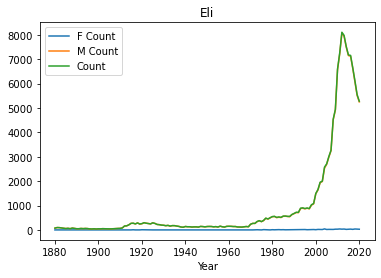

In [7]:
plot_name(df,'Eli')

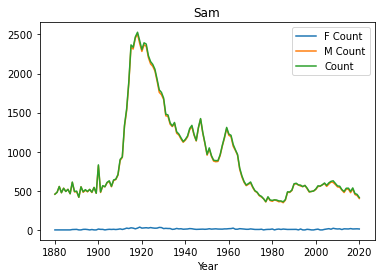

In [8]:
plot_name(df,'Sam')

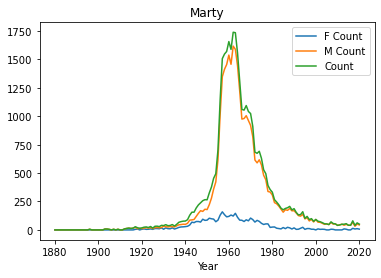

In [9]:
plot_name(df,'Marty')

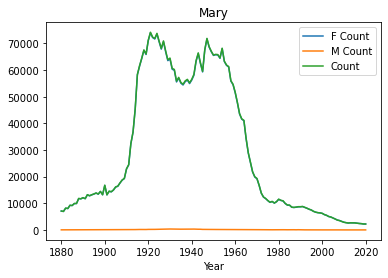

In [10]:
plot_name(df,'Mary')

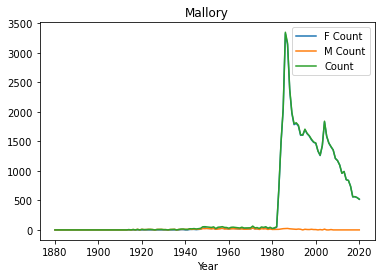

In [11]:
plot_name(df,'Mallory') #this is totally because of Family Ties

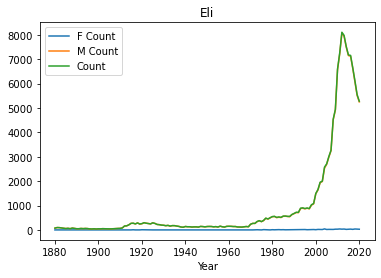

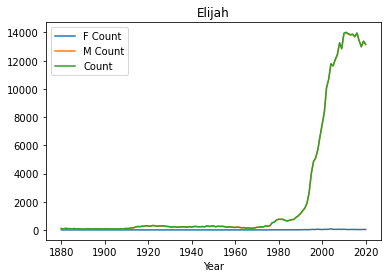

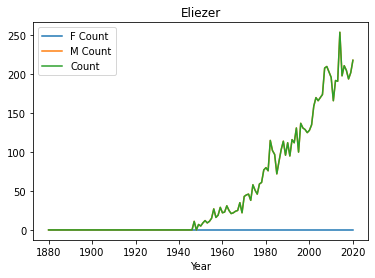

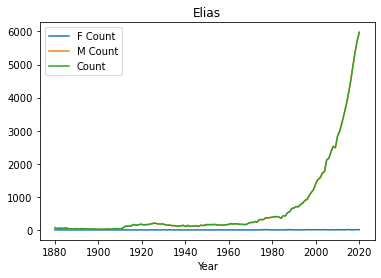

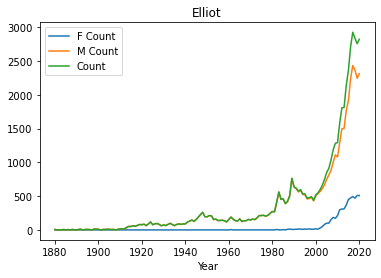

In [12]:
plot_name(df,'Eli')
plot_name(df,'Elijah')
plot_name(df,'Eliezer')
plot_name(df,'Elias')
plot_name(df,'Elliot')

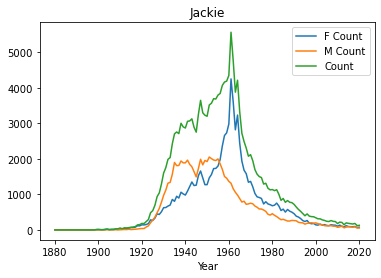

In [13]:
plot_name(df,'Jackie') #An example of a name which "switched genders"

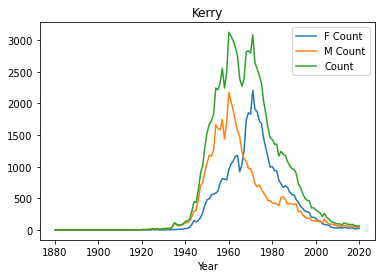

In [14]:
plot_name(df,'Kerry')

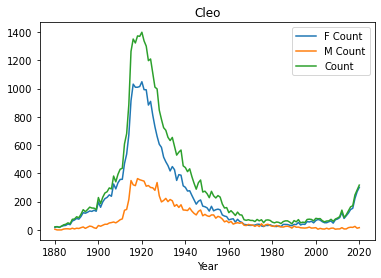

In [15]:
plot_name(df,'Cleo')

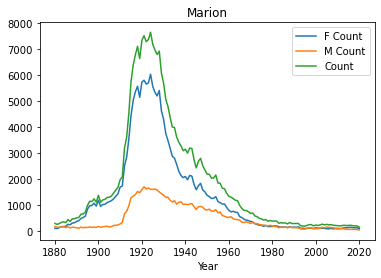

In [16]:
plot_name(df,'Marion')

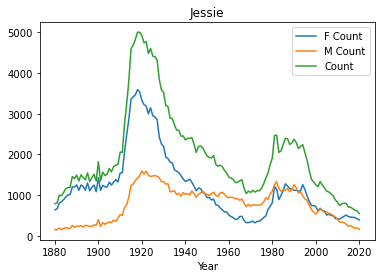

In [17]:
plot_name(df,'Jessie') #a complicated history...

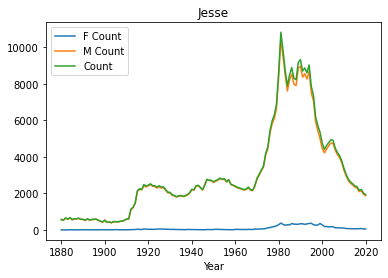

In [18]:
plot_name(df,'Jesse')